## Tarea #10.9
## FIS1344 - Métodos númericos y probabilidades
## Marcos Ausgusto Elgueta Salas

Ejercicio 5.3.12 libro de Burden

Un proyectil con masa $m = 0.11$ kg se dispara verticalmente hacia arriba con una velocidad inicial $v(0) = 8$ m/s y sufre una desaceleración debida a la fuerza de la gravedad $F = -mg$ y a la resistencia del aire $F = -kv|v|$, donde $g = 9.8$ m/s^2 y $k = 0.002$ kg/m.

* Encuentre la velocidad a $t = 0.1, 0.2, ..., 1.0$ segundos.
* Encuentre a la primera cifra decimal  el tiempo al cual el proyectil alcanza su máxima altura y vuelve a empezar a caer.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

La situación corresponde a la ecucación diferencial:
$$
mv'=-mg-kv|v|, v(0)=0,
$$

$$
x \leq v  \leq 1
$$

Podemos hacer h=0.1 y usar el metodo de taylor a segundo orden para obtener la velocidad para los delta tiempo.
$$
0.11v'=-1.078-0.002v|v| \\
$$
$$
v'=-9.8-0.0181818v|v|
$$
Luego hacemos f(t,y)=-9.8-0.0181818y|y| y derivamos:

$$
f'(t,y)=-2(0.0181818)|y|y'
$$

$$
=0.3356364+0.00066115y^{3}
$$

Entonces tenemos:

$$
T^{(2)}(t_0,w_o)= f(t_0,w_o)+h/2(f'(t_0,w_0))
$$

$$
w_{(i+1)}=w_i+hT^{(2)}(t_i,w_i)
$$

$$
t_0=0, w_0=8, h=0.1
$$

In [112]:
def taylor2(f, df, T, w_i, a, b, yo, N):
    
    h = (b-a)/N
    t = a
    w = yo
    ts = np.zeros(N+1)
    sol = np.zeros(N+1)
    for i in range(N):
        ts[i] = t
        sol[i] = w
        w = w + h*f(t, w) + h*h*df(t, w)/2
        t = t + h
        
    ts[N] = t
    sol[N] = w
    return ts, sol

In [115]:
def f(t, y):
    return -9.8-0.0181818*y**2

def df(t, y):
    return 0.356364+0.000661156*y**3

def T(t, y):
    return f(t, y) + (h/2)*df(t, y)

def w_i(t, y):
    return w + h*T(t, y)


taylor2(f, df, T, w_i, 0, 1, 8, 10)


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 array([ 8.        ,  6.90711086,  5.84323996,  4.80360237,  3.78379683,
         2.77972664,  1.7875306 ,  0.80352174, -0.17586863, -1.15414306,
        -2.13478823]))

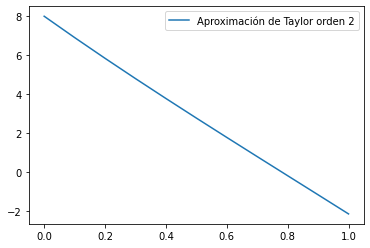

In [132]:
ts = np.linspace(0, 1, 10)
plt.plot(*taylor2(f, df, T, w_i, 0, 1, 8, 10), label='Aproximación de Taylor orden 2')
plt.legend()

Podemos ver que entre [0.80352174, -0.17586863] cambia de dirección.
Podemos hacer una interpolación:

In [144]:
def lagrange(x, puntos):
    '''
    Interpola una función que pasa por n puntos como un polinomio
    de Legendre y lo evalúa en el punto x. Los puntos deben ser
    dados como una lista de tuplas (xi, f(xi)).
    '''
    
    Lis = np.ones(len(puntos))
    fs = np.ones(len(puntos))
    for i in range(len(puntos)):
        fs[i] = puntos[i][1]
        for j in range(len(puntos)):
            if j != i:
                Lis[i] *= (x - puntos[j][0])/(puntos[i][0] - puntos[j][0])
    
    return sum(fs*Lis)

In [150]:
puntos = np.array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.]),np.array([ 8.,  6.90711086,  5.84323996,  4.80360237,  3.78379683,
         2.77972664,  1.7875306 ,  0.80352174, -0.17586863, -1.15414306, -2.13478823])


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 array([ 8.        ,  6.90711086,  5.84323996,  4.80360237,  3.78379683,
         2.77972664,  1.7875306 ,  0.80352174, -0.17586863, -1.15414306,
        -2.13478823]))

In [153]:
lagrange(0.8, puntos)

0.780711086

Por lo tanto el cambio de dirección es aproximadamente en t~0.78(s)